In [36]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

In [37]:
def rgb2gray(I):
    r, g, b = I[:,:,0], I[:,:,1], I[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [38]:
def stocker_images_train(nbr_im, filename):
    filename1=filename+'Autistic.0.jpg'
    I=resize(plt.imread(filename1),(224,224),anti_aliasing=True)
    nl,nc=rgb2gray(I).shape
    mat_image=np.zeros((nl,nc,int(nbr_im/2)))
    k=0
    for j in ["Autistic","Non_Autistic"]:
        for i in range(0,nbr_im//2,2):
            filename1= filename+j+"."+ str(i) + '.jpg'
            mat_image[:,:,k]=resize(rgb2gray(plt.imread(filename1)),(224,224),anti_aliasing=True)
            k=k+1
    return mat_image

In [39]:
def stocker_images_train_RGB(nbr_im, filename):
    filename1=filename+'Autistic.0.jpg'
    I=resize(plt.imread(filename1),(224,224),anti_aliasing=True)
    nl,nc,z=I.shape
    mat_image=np.zeros((nl,nc,z,int(nbr_im/2)))
    k=0
    for j in ["Autistic","Non_Autistic"]:
        for i in range(0,nbr_im//2,2):
            filename1= filename+j+"."+ str(i) + '.jpg'
            mat_image[:,:,:,k]=resize(plt.imread(filename1),(224,224),anti_aliasing=True)
            k=k+1
    return mat_image

In [40]:
def stocker_images_test(nbr_im, filename):
    filename1=filename+'Autistic.1.jpg'
    I=resize(plt.imread(filename1),(224,224),anti_aliasing=True)
    nl,nc=rgb2gray(I).shape
    mat_image=np.zeros((nl,nc,int(nbr_im/2)))
    k=0
    for j in ["Autistic","Non_Autistic"]:
        for i in range(1,nbr_im//2,2):
            filename1= filename+j+"."+ str(i) + '.jpg'
            mat_image[:,:,k]=resize(rgb2gray(plt.imread(filename1)),(224,224),anti_aliasing=True)
            k=k+1
    return mat_image

In [41]:
def stocker_images_test_RGB(nbr_im, filename):
    filename1=filename+'Autistic.1.jpg'
    I=resize(plt.imread(filename1),(500,500),anti_aliasing=True)
    nl,nc,z=I.shape
    mat_image=np.zeros((nl,nc,z,int(nbr_im/2)))
    k=0
    for j in ["Autistic","Non_Autistic"]:
        for i in range(1,nbr_im//2,2):
            filename1= filename+j+ "."+str(i) + '.jpg'
            mat_image[:,:,:,k]=resize(plt.imread(filename1),(500,500),anti_aliasing=True) 
            k=k+1
    return mat_image

In [42]:
def hist(I):
    [nl,nc]=np.shape(I)
    h=np.zeros(256)
    I_m=np.round(I)
    for i in range(0,nl):
        for j in range(0,nc):
            val=int(I_m[i][j])
            h[val]+=1
    return h

In [43]:
def histN(I):
    [nl,nc]=np.shape(I)
    h=hist(I)
    return h/(nl*nc)

In [44]:
def histc(I):
    a=hist(I)
    b=np.zeros(256)
    b[0]=a[0]
    for i in range(1,len(a)):
        b[i]=b[i-1]+a[i]    
    return b

In [45]:
def distance(x,y):
    d=np.sqrt(np.sum(np.power((x-y),2)))
    return d

In [46]:
def distancemanh(x,y):
    d=np.sqrt(np.sum(np.absolute(x-y)))
    return d

In [47]:
def clr_moy(image):
    moy1=[]
    for f in range (3):
        h=np.mean(image[:,:,f])
        moy1.append(h)
    return np.array(moy1)

In [48]:
def variance(I):
    nl,nc=I.shape
    m=np.mean(I)
    va=np.sum((I-m)**2)/(nl*nc)
    return va

In [49]:
def energie(I): 
    nl,nc=I.shape
    en= np.sum(I**2)
    return en

In [50]:
def entropie(I):
    ent=np.sum(I*np.log2(I+1e-10))
    return ent

In [51]:
def contraste(I):
    nl,nc=I.shape
    co=0
    for i in range(nl): 
        for j in range(nc):
            co += ((i-j)**2)*I[i,j] 
    return co

In [52]:
def homogenite(I):
    nl,nc=I.shape
    mo=0
    for i in range(nl): 
        for j in range(nc):
            mo += I[i,j]/(1+np.absolute(i-j))
    return mo

In [53]:
def stocker_desc_clrmoy(matrx):
    nl,nc,nC,nbr_img=matrx.shape
    desc=np.zeros((nbr_img,3))
    for i in range(nbr_img):
        desc[i] = clr_moy(matrx[:,:,:,i])  
    return desc

In [54]:
def stocker_desc_hito(matrx):
    nl,nc,nbr_img=matrx.shape
    desc=np.zeros((nbr_img,256))
    for i in range(nbr_img):
        desc[i] = hist(matrx[:,:,i])  
    return desc

In [55]:
def stocker_desc_hitoN(matrx):
    nl,nc,nbr_img=matrx.shape
    desc=np.zeros((nbr_img,256))
    for i in range(nbr_img):
        desc[i] = histN(matrx[:,:,i])  
    return desc

In [56]:
def stocker_desc_hitoc(matrx):
    nl,nc,nbr_img=matrx.shape
    desc=np.zeros((nbr_img,256))
    for i in range(nbr_img):
        desc[i] = histc(matrx[:,:,i])  
    return desc

In [57]:
def stocker_desc_txtr(matrx):
    nl,nc,nbr_img=matrx.shape
    desc=np.zeros((nbr_img,5))
    for i in range(nbr_img):
        desc[i] = [variance(matrx[:,:,i]),
                   energie(matrx[:,:,i]),
                   entropie(matrx[:,:,i]),
                   contraste(matrx[:,:,i]),
                   homogenite(matrx[:,:,i])]  
    return desc

In [58]:
filename='Autisme-Dataset-desc/'
nbr_im=300
mat_image_train=stocker_images_train(nbr_im, filename)
mat_image_test=stocker_images_test(nbr_im, filename)

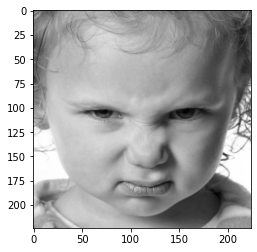

In [59]:
I=plt.imshow(mat_image_train[:,:,10],cmap=plt.get_cmap('gray'))
plt.show()

In [60]:
mat_image_train_rgb=stocker_images_train_RGB(nbr_im, filename)
mat_image_test_rgb=stocker_images_test_RGB(nbr_im, filename)

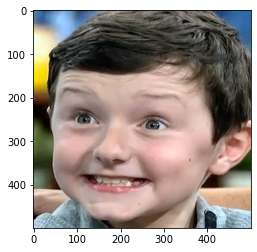

In [61]:
I=plt.imshow(mat_image_test_rgb[:,:,:,10])
plt.show()

In [62]:
mat_desc_train=stocker_desc_txtr(mat_image_train)
mat_desc_test=stocker_desc_txtr(mat_image_test)
print(mat_desc_train)
print(mat_desc_test)

[[3.76281799e+03 1.16580970e+09 5.09739338e+07 5.23054140e+10
  3.10681575e+05]
 [3.85799909e+03 1.28523663e+09 5.44793245e+07 6.01419165e+10
  3.10729962e+05]
 [4.49194412e+03 1.05659513e+09 4.67162821e+07 5.54297974e+10
  2.68421504e+05]
 [1.42359770e+03 9.68075250e+08 4.77745218e+07 5.27365888e+10
  2.80130804e+05]
 [2.05349294e+03 9.38852818e+08 4.60117133e+07 5.86838246e+10
  2.64587346e+05]
 [2.75647218e+03 1.65700359e+09 6.56559915e+07 7.83783911e+10
  3.42916774e+05]
 [3.65520768e+03 1.00409911e+09 4.60724959e+07 3.93930043e+10
  2.93691441e+05]
 [3.96036058e+03 1.27810864e+09 5.41054683e+07 6.01425231e+10
  3.08509550e+05]
 [4.40767790e+03 1.33510419e+09 5.52255817e+07 5.84605868e+10
  2.99776379e+05]
 [2.58586047e+03 9.56792973e+08 4.60012935e+07 4.95656383e+10
  2.62939540e+05]
 [2.65697784e+03 1.32063135e+09 5.67684491e+07 6.24165604e+10
  3.10027009e+05]
 [3.29947951e+03 1.29106771e+09 5.52544183e+07 5.67165934e+10
  3.26504637e+05]
 [4.32669380e+03 1.48659721e+09 5.958895

In [63]:
def co_occurence(m):
    M = m.astype(int)
    co = np.zeros((256,256))
    for i in range(M.shape[0]):
        for j in range(M.shape[1]-1):
            co[M[i,j],M[i,j+1]] +=1
    return co/np.max(co)

In [64]:
def stocker_desc_txtr_co_occur(matrx):
    nl,nc,nbr_img=matrx.shape
    desc=np.zeros((nbr_img,5))
    for i in range(nbr_img):
        desc[i] = [variance(co_occurence(matrx[:,:,i])),
                   energie(co_occurence(matrx[:,:,i])),
                   entropie(co_occurence(matrx[:,:,i])),
                   contraste(co_occurence(matrx[:,:,i])),
                   homogenite(co_occurence(matrx[:,:,i]))]  
    return desc

In [65]:
def stocke_dist(mat_desc_train,mat_desc_test,nbr_img):
    distance_mat=np.zeros((nbr_img,nbr_img))
    for i in range(0,nbr_img):
        for j in range(0,nbr_img):
            distance_mat[i,j] = np.sqrt(np.sum(mat_desc_train[i]-mat_desc_test[j])**2)
    return distance_mat

In [66]:
nbr_img=150
distance_mat=stocke_dist(mat_desc_train,mat_desc_test,nbr_img)

In [67]:
mat_index=np.argsort(distance_mat,axis=1)
mat_index

array([[  1, 149,  34, ...,  56, 119, 117],
       [ 75,  47,  77, ...,  56, 119, 117],
       [ 92,  41,  99, ...,  56, 119, 117],
       ...,
       [ 66,  98, 147, ..., 114, 115, 138],
       [ 17,  26,  55, ..., 114, 115, 138],
       [ 57,  81,  97, ...,  56, 119, 117]], dtype=int64)

In [73]:
def stocke_pert(mat_index):
    pert=np.zeros((nbr_img,nbr_img))
    nbr_pas=6
    k=0
    for i in range(nbr_pas):
        z1=k
        z2=(i+1)*50
        classe=mat_index[z1:z2,:]
        a=classe>=z1
        b=classe<z2
        pert[z1:z2,:]=a*b
        k=k+nbr_pas
    return pert

In [75]:
stocke_pert(mat_index)

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [76]:
def rappel_precision(target):
    nl,nc=target.shape
    prec=np.zeros((nl,nc));
    rec=np.zeros((nl,nc));
    accur=np.zeros((nl,nc));
    for i in range(0,nl):
        pertinent= np.sum(target[i,:]);
        for j in range(1,nc+1):
            VP=np.sum(target[i,0:j])
            FP=j-VP
            FN=pertinent-VP
            VN=300-i-FN
            if VP==0:
                prec[i,j-1]=0
                rec[i,j-1] =0
            else:
                accur[i,j-1]=(VP+VN)/(VP+VN+FP+FN)
                prec[i,j-1]=VP/(VP+FP)
                rec[i,j-1] =VP/(VP+FN)
                
    accur_moy=np.sum(accur)/(accur.shape[0]*accur.shape[1])
    prec_moy=np.sum(prec)/(prec.shape[0]*prec.shape[1])
    rec_moy=np.sum(rec)/(rec.shape[0]*rec.shape[1])
    print("precision moyenne=",prec_moy," rappel moyenne=",rec_moy," accuracy moyenne=",accur_moy)
    

In [77]:
rappel_precision(stocke_pert(mat_index))

precision moyenne= 0.76252191223555  rappel moyenne= 0.49209738362376537  accuracy moyenne= 0.7145687648322572


In [79]:
def affichageee(ty):
    filename='Autisme-Dataset-desc/'
    nbr_img=300
    if ty=="couleur moyenne":
        mat_image_train_rgb=stocker_images_train_RGB(nbr_im, filename)
        mat_image_test_rgb=stocker_images_test_RGB(nbr_im, filename)
    else:      
        mat_image_train=stocker_images_train(nbr_im, filename)
        mat_image_test=stocker_images_test(nbr_im, filename)
    

    if ty=="texture":
        texture_train=stocker_desc_txtr(mat_image_train)
        texture_test=stocker_desc_txtr(mat_image_test)
        distance_mat=stocke_dist(texture_train,texture_test,nbr_img//2)

    elif ty=="histogramme":
        hist_train=stocker_desc_hito(mat_image_train)
        hist_test=stocker_desc_hito(mat_image_test)
        distance_mat=stocke_dist(hist_train,hist_test,nbr_img//2)

    elif ty=="histogramme cumule":
        histc_train=stocker_desc_hitoc(mat_image_train)
        histc_test=stocker_desc_hitoc(mat_image_test)
        distance_mat=stocke_dist(histc_train,histc_test,nbr_img//2)

    elif ty=="histogramme normalise":
        histn_train=stocker_desc_hitoN(mat_image_train)
        histn_test=stocker_desc_hitoN(mat_image_test)
        distance_mat=stocke_dist(histn_train,histn_test,nbr_img//2)
    elif ty=="couleur moyenne":
        clr_moy_train=stocker_desc_clrmoy(mat_image_train_rgb)
        clr_moy_test=stocker_desc_clrmoy(mat_image_test_rgb)
        distance_mat=stocke_dist(clr_moy_train,clr_moy_test,nbr_img//2)
    elif ty=="matrice de co occurence":
        cooccurence_train=stocker_desc_txtr_co_occur(mat_image_train)
        cooccurence_test=stocker_desc_txtr_co_occur(mat_image_test)
        distance_mat=stocke_dist(cooccurence_train,cooccurence_test,nbr_img//2)
    mat_index=np.argsort(distance_mat,axis=1)
    rappel_precision(stocke_pert(mat_index))

In [80]:
affichageee("histogramme")

precision moyenne= 0.8332647861573462  rappel moyenne= 0.515943630577392  accuracy moyenne= 0.7429262084993058


In [81]:
affichageee("histogramme cumule")

precision moyenne= 0.7648968184502121  rappel moyenne= 0.4912580062964638  accuracy moyenne= 0.7139827567549872


In [82]:
affichageee("histogramme normalise")

precision moyenne= 0.8285361866945146  rappel moyenne= 0.511613990829992  accuracy moyenne= 0.7355335813613579


In [83]:
affichageee("texture")

precision moyenne= 0.76252191223555  rappel moyenne= 0.49209738362376537  accuracy moyenne= 0.7145687648322572


In [84]:
affichageee("matrice de co occurence")

precision moyenne= 0.7823972377556043  rappel moyenne= 0.5028907206977191  accuracy moyenne= 0.7262607686564783


In [85]:
affichageee("couleur moyenne")

precision moyenne= 0.7632816577713575  rappel moyenne= 0.4910265796635726  accuracy moyenne= 0.7141779882094729
